In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['axes.unicode_minus'] = False

# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "Malgun Gothic")

# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [4]:
df_raw = pd.read_csv("오대오.csv", encoding='euc-kr')
df_raw = df_raw.drop('Unnamed: 0', axis = 1)
df_raw

,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,TAG_013,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,14.516590,3.727272,3.659474,64.386761,0.000000,10.879403,0.0,100.0,91.126781,43.569761,...,40.107615,39.866318,39.867307,39.242749,0.045077,0.338026,0.199523,0.003820,46.439539,0
1,14.438721,3.863102,3.823411,0.370337,0.000000,0.019885,0.0,100.0,92.520378,52.853971,...,40.061705,29.150599,0.000000,39.549413,0.060481,0.313373,0.098486,0.035789,94.234855,0
2,14.369410,3.819573,3.849695,122.368513,27.823089,0.096102,0.0,100.0,92.611488,51.192340,...,39.910447,40.206674,40.657971,40.766664,0.489483,0.178890,0.051197,0.035789,64.669526,0
3,14.080565,3.913643,3.882729,227.436914,0.000000,35.740705,0.0,100.0,90.915691,48.961057,...,33.887585,40.356547,39.592079,40.202029,0.264244,0.228764,0.009547,0.029205,48.615663,0
4,14.344228,3.676193,3.674700,76.245618,0.000000,12.329847,0.0,100.0,92.037182,48.874683,...,40.347095,40.627034,39.046095,39.954925,0.193447,0.410250,0.027081,0.087180,49.166320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109435,14.664333,3.582974,3.536546,67.188139,0.000000,0.000000,0.0,100.0,91.572893,49.440436,...,38.212043,35.510047,38.788630,40.738352,0.121573,0.195366,0.021214,0.097006,47.532919,1
109436,14.252853,3.924505,3.894912,165.684886,5.189121,0.000000,0.0,100.0,91.273919,49.740476,...,39.948361,41.142189,40.687020,39.954327,0.061273,0.201190,0.121320,0.077722,34.597847,1
109437,14.730582,3.548382,3.516528,27.604100,2.630102,0.000000,0.0,100.0,91.385959,50.079478,...,39.606370,40.273973,40.311136,36.640596,0.345311,0.277868,0.044777,0.000000,78.200642,1
109438,14.223682,3.595405,3.693201,210.320778,0.000000,37.981309,0.0,100.0,90.416878,51.816844,...,2.718306,40.355379,14.064412,40.099579,0.136705,0.257537,0.004777,0.041058,30.884150,1


In [5]:
# 모델 빌드전 결측치 최종 확인
df_raw.isna().sum()

TAG_001    0
TAG_002    0
TAG_004    0
TAG_005    0
TAG_006    0
          ..
TAG_190    0
TAG_191    0
TAG_192    0
TAG_193    0
cause      0
Length: 140, dtype: int64

In [15]:
# split data
train_data, test_data = train_test_split(df_raw, train_size = 0.6, random_state = 1234)
print(train_data.shape)
print(test_data.shape)

(65664, 140)
(43776, 140)


In [16]:
# 시간 절약을 위하여 데이터 down sampling
train_data = train_data.sample(frac = 0.01)
test_data  = test_data.sample(frac = 0.01)

In [17]:
my_y = 'cause'
my_x = train_data.drop('cause', axis = 1).columns

# 모델링 - DT

In [18]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234 )
tree_uncustomized.fit(train_data[my_x],train_data[my_y])

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(train_data[my_x],train_data[my_y])))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(test_data[my_x],test_data[my_y])))

DecisionTreeClassifier(random_state=1234)

Accuracy on training set: 1.000
Accuracy on test set: 0.838


## 최대깊이 조정

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(3, 25)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(train_data[my_x],train_data[my_y])
    train_accuracy.append(tree.score(train_data[my_x],train_data[my_y]))
    test_accuracy.append(tree.score(test_data[my_x],test_data[my_y]))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

DecisionTreeClassifier(max_depth=3, random_state=1234)

DecisionTreeClassifier(max_depth=4, random_state=1234)

DecisionTreeClassifier(max_depth=5, random_state=1234)

DecisionTreeClassifier(max_depth=6, random_state=1234)

DecisionTreeClassifier(max_depth=7, random_state=1234)

DecisionTreeClassifier(max_depth=8, random_state=1234)

DecisionTreeClassifier(max_depth=9, random_state=1234)

DecisionTreeClassifier(max_depth=10, random_state=1234)

DecisionTreeClassifier(max_depth=11, random_state=1234)

DecisionTreeClassifier(max_depth=12, random_state=1234)

DecisionTreeClassifier(max_depth=13, random_state=1234)

DecisionTreeClassifier(max_depth=14, random_state=1234)

DecisionTreeClassifier(max_depth=15, random_state=1234)

DecisionTreeClassifier(max_depth=16, random_state=1234)

DecisionTreeClassifier(max_depth=17, random_state=1234)

DecisionTreeClassifier(max_depth=18, random_state=1234)

DecisionTreeClassifier(max_depth=19, random_state=1234)

DecisionTreeClassifier(max_depth=20, random_state=1234)

DecisionTreeClassifier(max_depth=21, random_state=1234)

DecisionTreeClassifier(max_depth=22, random_state=1234)

DecisionTreeClassifier(max_depth=23, random_state=1234)

DecisionTreeClassifier(max_depth=24, random_state=1234)

In [24]:
para_depth

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [25]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.857,0.797
1,4,0.886,0.813
2,5,0.904,0.826
3,6,0.919,0.824
4,7,0.927,0.831
5,8,0.933,0.820
6,9,0.936,0.820
7,10,0.947,0.826
8,11,0.962,0.815
9,12,0.968,0.824


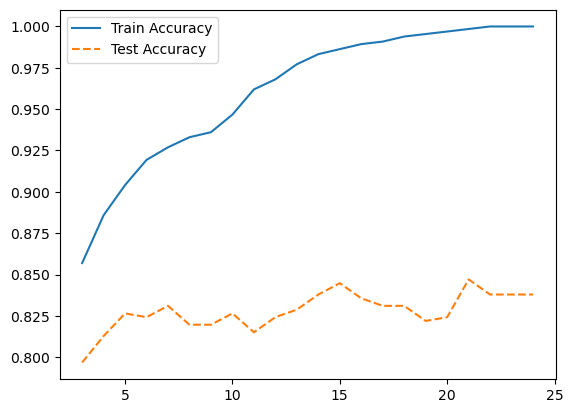

In [26]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [27]:
# 변수명 저장
v_feature_name = train_data[my_x].columns

## 분리노드 조정

In [28]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=15, random_state=1234)
    tree.fit(train_data[my_x],train_data[my_y])
    train_accuracy.append(tree.score(train_data[my_x],train_data[my_y]))
    test_accuracy.append(tree.score(test_data[my_x],test_data[my_y]))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=20, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=30, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=40, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=50, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=60, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=70, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=80, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=90, random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_split=100, random_state=1234)

In [29]:
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [30]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.980,0.838
1,20,0.956,0.840
2,30,0.939,0.804
3,40,0.939,0.804
4,50,0.939,0.804
5,60,0.936,0.808
6,70,0.936,0.808
7,80,0.915,0.811
8,90,0.910,0.817
9,100,0.903,0.811


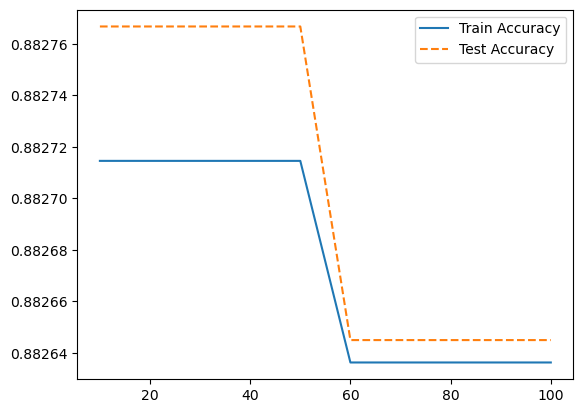

In [27]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

## 최소 샘플 수

## 잎사귀 노드

In [31]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 2~20
para_leaf = [n_leaf * 2 for n_leaf in range(2, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=90, \
		max_depth = 15, random_state=1234)
    tree.fit(train_data[my_x],train_data[my_y])
    train_accuracy.append(tree.score(train_data[my_x],train_data[my_y]))
    test_accuracy.append(tree.score(test_data[my_x],test_data[my_y]))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=6, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=8, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=12, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=14, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=16, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=18, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=22, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=24, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=26, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=28, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=30, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=32, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=34, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=36, min_samples_split=90,
                       random_state=1234)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=38, min_samples_split=90,
                       random_state=1234)

In [32]:
para_leaf

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

In [33]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,4,0.896,0.822
1,6,0.871,0.820
2,8,0.871,0.820
3,10,0.871,0.820
4,12,0.871,0.820
5,14,0.871,0.820
6,16,0.871,0.820
7,18,0.869,0.820
8,20,0.843,0.788
9,22,0.840,0.788


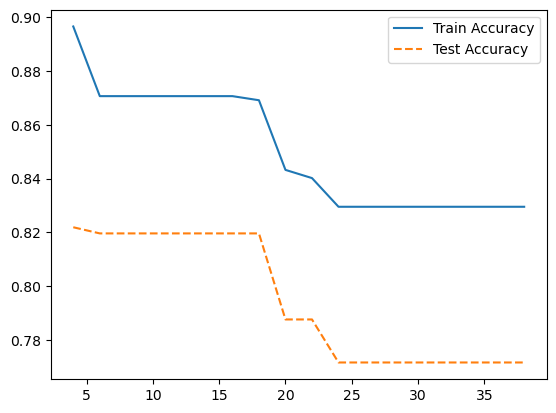

In [34]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

DecisionTreeClassifier(max_depth=15, min_samples_leaf=18, min_samples_split=90,
                       random_state=1234)

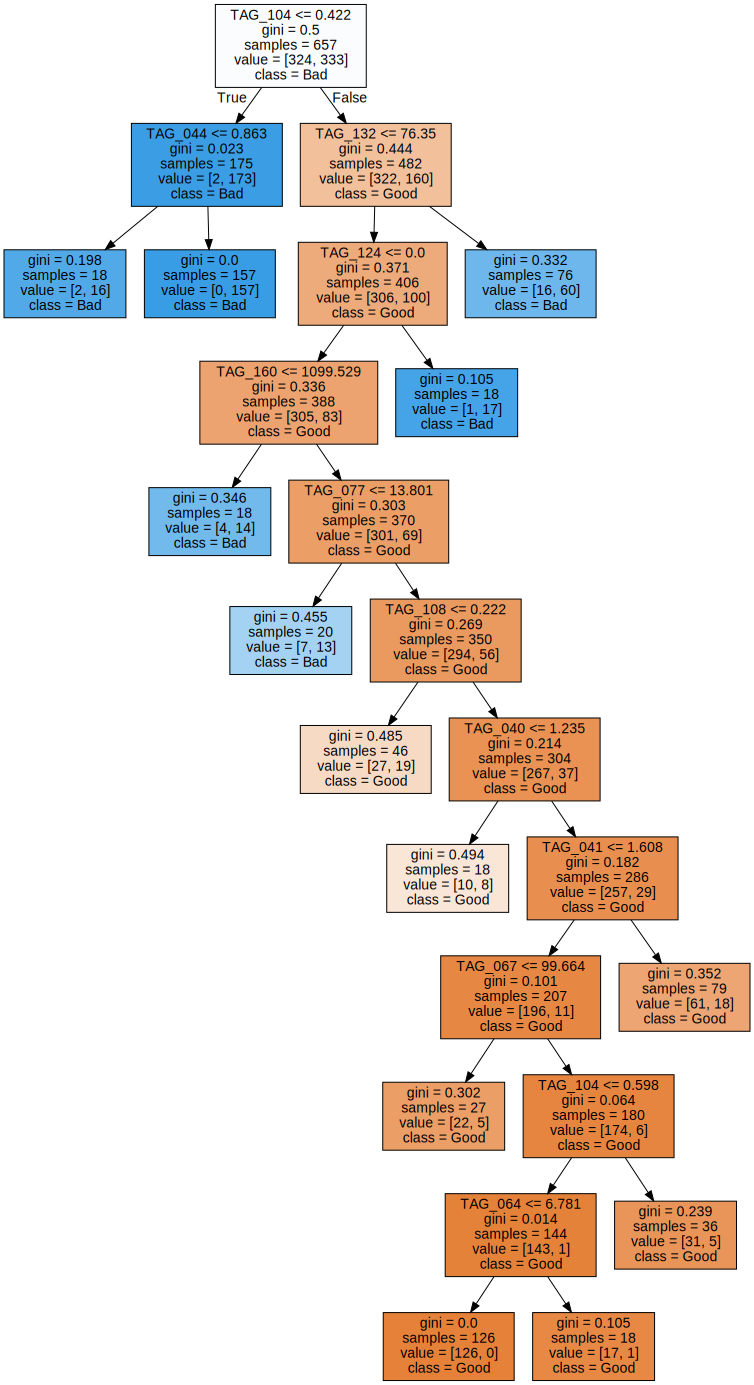

In [36]:
# 잎사귀의 최소 자료 수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth=15, min_samples_split=90, min_samples_leaf=18, random_state=1234)
tree_low.fit(train_data[my_x],train_data[my_y])

export_graphviz(tree_low, out_file=" tree_low.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open(" tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [37]:
tree_final = DecisionTreeClassifier(max_depth=15, min_samples_split=90, min_samples_leaf=18, random_state=1234)
tree_final.fit(train_data[my_x],train_data[my_y])

DecisionTreeClassifier(max_depth=15, min_samples_leaf=18, min_samples_split=90,
                       random_state=1234)

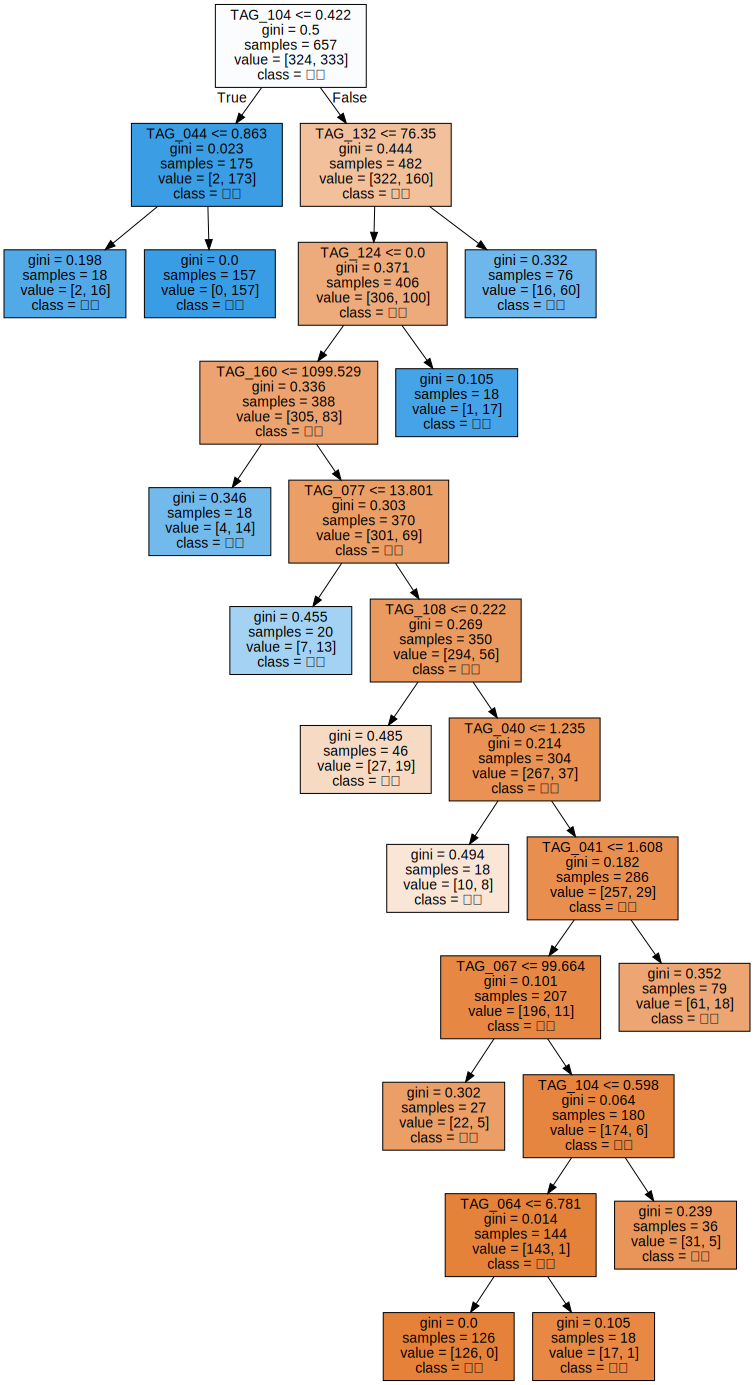

In [43]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["정상", "불량"],
# export_graphviz(tree_final, out_file="tree_final.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [40]:
# 평가
y_pred = tree_final.predict(test_data[my_x])
print("Accuracy: {0:.3f}\n".format(tree_final.score(test_data[my_x],test_data[my_y])))
print("Confusion matrix: \n{}".format(confusion_matrix(test_data[my_y], y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(test_data[my_y], y_pred, digits=3))

Accuracy: 0.820

Confusion matrix: 
[[170  34]
 [ 45 189]]
              precision    recall  f1-score   support

           0      0.791     0.833     0.811       204
           1      0.848     0.808     0.827       234

    accuracy                          0.820       438
   macro avg      0.819     0.821     0.819       438
weighted avg      0.821     0.820     0.820       438



In [41]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
71,TAG_104,0.542
86,TAG_124,0.182
91,TAG_132,0.109
100,TAG_143,0.039
92,TAG_135,0.031
...,...,...
42,TAG_062,0.000
41,TAG_060,0.000
40,TAG_058,0.000
39,TAG_057,0.000


<Figure size 1000x500 with 0 Axes>

<BarContainer object of 139 artists>

([<matplotlib.axis.YTick at 0x7fb29d1692e0>,
 [Text(0, 0, 'TAG_152'),
  Text(0, 1, 'TAG_008'),
  Text(0, 2, 'TAG_011'),
  Text(0, 3, 'TAG_012'),
  Text(0, 4, 'TAG_013'),
  Text(0, 5, 'TAG_014'),
  Text(0, 6, 'TAG_015'),
  Text(0, 7, 'TAG_016'),
  Text(0, 8, 'TAG_017'),
  Text(0, 9, 'TAG_020'),
  Text(0, 10, 'TAG_021'),
  Text(0, 11, 'TAG_022'),
  Text(0, 12, 'TAG_024'),
  Text(0, 13, 'TAG_027'),
  Text(0, 14, 'TAG_031'),
  Text(0, 15, 'TAG_032'),
  Text(0, 16, 'TAG_033'),
  Text(0, 17, 'TAG_035'),
  Text(0, 18, 'TAG_149'),
  Text(0, 19, 'TAG_107'),
  Text(0, 20, 'TAG_102'),
  Text(0, 21, 'TAG_105'),
  Text(0, 22, 'TAG_052'),
  Text(0, 23, 'TAG_049'),
  Text(0, 24, 'TAG_007'),
  Text(0, 25, 'TAG_048'),
  Text(0, 26, 'TAG_046'),
  Text(0, 27, 'TAG_044'),
  Text(0, 28, 'TAG_043'),
  Text(0, 29, 'TAG_042'),
  Text(0, 30, 'TAG_041'),
  Text(0, 31, 'TAG_038'),
  Text(0, 32, 'TAG_047'),
  Text(0, 33, 'TAG_106'),
  Text(0, 34, 'TAG_006'),
  Text(0, 35, 'TAG_050'),
  Text(0, 36, 'TAG_058'),
  T

Text(0.5, 0, '설명변수 중요도')

Text(0, 0.5, '설명변수')

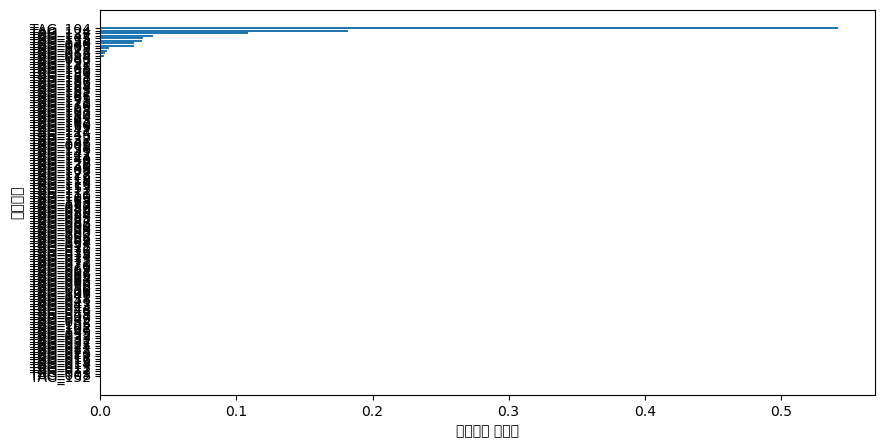

In [42]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")


In [44]:
# 다른 방식으로 Tree 출력
from subprocess import call
from IPython.display import Image

# 생성된 .dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree_final.dot', '-o', 'tree_final.png', '-Gdpi=600'])
# jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
Image(filename = 'tree_final.png')

0